# Two scatter correction techniques for NIR spectroscopy in Python

Notebook associate with the blog post __[Two scatter correction techniques for NIR spectroscopy in Python](https://nirpyresearch.com/two-scatter-correction-techniques-nir-spectroscopy-python/)__ from __[Nirpy Research](https://nirpyresearch.com/)__ 

In [1]:
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Multiplicative scatter correction

In [2]:
def msc(input_data, reference=None):
    ''' Perform Multiplicative scatter correction'''

    # Baseline correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()

    # Get the reference spectrum. If not given, estimate from the mean    
    if reference is None:    
        # Calculate mean
        matm = np.mean(input_data, axis=0)
    else:
        matm = reference

    # Define a new data matrix and populate it with the corrected data    
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(matm, input_data[i,:], 1, full=True)
        # Apply correction
        output_data[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 

    return (output_data, matm)

## Standard Normal Variate

In [5]:
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):

        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])

    return output_data

## Example usage

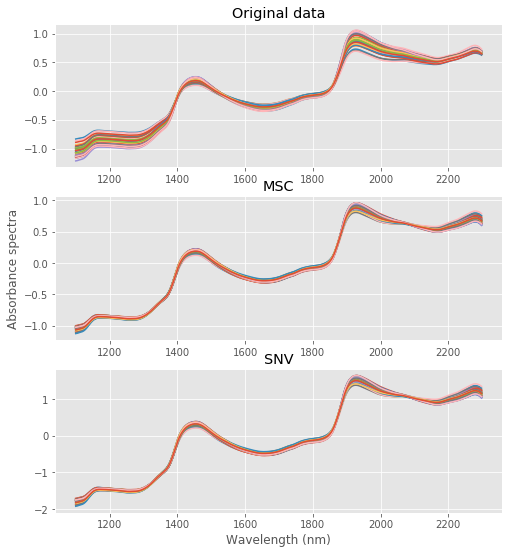

In [6]:
# Load data
url = 'https://raw.githubusercontent.com/nevernervous78/nirpyresearch/master/data/peach_spectra+brixvalues.csv'
data = pd.read_csv(url)
X = data.values[:,1:]
wl = np.arange(1100,2300,2)

# Apply correction
Xmsc = msc(X)[0] # Take the first element of the output tuple
Xsnv = snv(X)

## Plot original and corrected spectra
plt.figure(figsize=(8,9))
with plt.style.context(('ggplot')):
    
    ax1 = plt.subplot(311)
    plt.plot(wl, X.T)
    plt.title('Original data')
    
    ax2 = plt.subplot(312)
    plt.plot(wl, Xmsc.T)
    plt.ylabel('Absorbance spectra')
    plt.title('MSC')
    
    ax2 = plt.subplot(313)
    plt.plot(wl, Xsnv.T)
    plt.xlabel('Wavelength (nm)')
    plt.title('SNV')
    
    plt.show()